# Naive Bayes for Flower Recognition
In this assignment, you will be asked to implement Gaussian Naive Bayes by yourself (sci-kit learn is not allowed) and use it classify what kind of iris flower the sample is given its features listed below:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

There are three kinds of flowers: Iris Setosa, Iris Versicolour and Iris Virginica.
The data we get comes from [Kaggle: Iris Dataset Visualization and Machine Learning](https://www.kaggle.com/xuhewen/iris-dataset-visualization-and-machine-learning). Make sure you have installed pandas, numpy and seaborn before running the script.
```bash
    conda install pandas numpy seaborn
```
or

```bash
    pip3 install pandas numpy seaborn
```
The following code loads the data and the dataset looks like the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
iris = pd.read_csv('iris_data.txt', header=None) #read dataset
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'] # rename each column
iris_visual = shuffle(iris, random_state = 0) # shuffle the dataset
iris_visual.head(10) #print the top ten entries

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualization of the dataset.
The following code visualize the distribution of each pair of the features within each class. (Diagnals are probability density function for each feature).

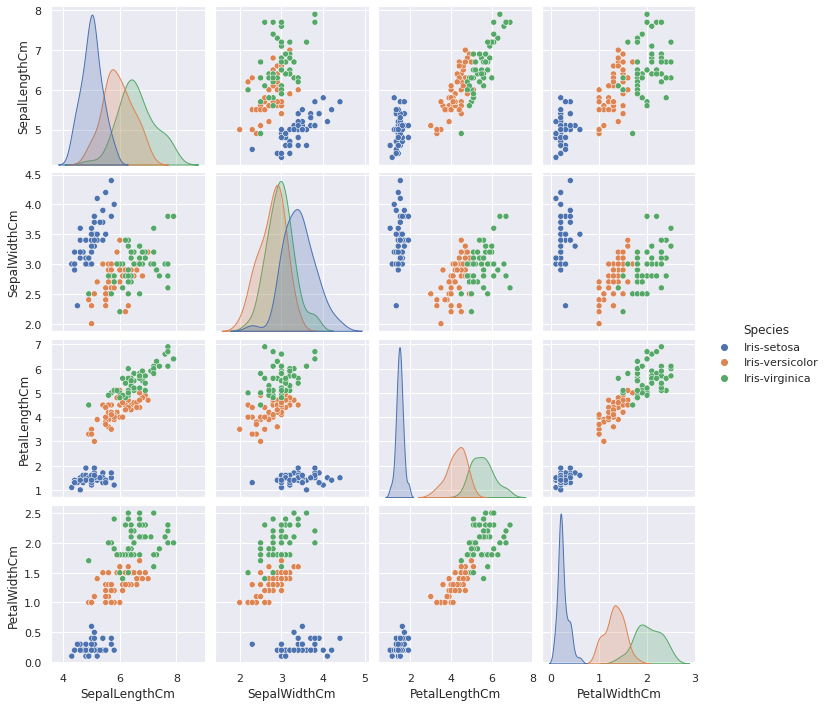

In [2]:
import seaborn as sns
sns.set()
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],
             hue="Species", diag_kind="kde")

## Data splitting
Next, we split the data into training and testing sets according to 60/40 rule. 

In [3]:
from sklearn.model_selection import train_test_split
iris_data = np.array(iris)
X_trn, X_tst, y_trn, y_tst = train_test_split(iris_data[:,0:4], iris_data[:,4], test_size = 0.4, random_state = 0) # split the dataset into training and testing sets

# Problem 1 Write your own Gaussian Naive Bayes code
Using the skeleton provided below, write your own code for learning and inference using Gaussian Naive Bayes model. You can use the skeleton provided in the second problem to verify whether you are writing it correctly. Reading through chapter 1.9.1 in the following link and the slide from last year can be useful:
https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.dropbox.com/s/6d5h6fig1fj44e4/Naive_Bayes.pdf?dl=0

In [7]:
X_trn.shape

(90, 4)

In [14]:
import math
def gnb_train(X, y):
    # X is the training set where each row is a sample and each column is a feature.
    # y is the training labels which correspond to each row of X
    output_labels = list(set(y)) #all possible outputs in the training set
    output_size = len(output_labels) # the number of all possible outputs
    prior = np.zeros(output_size) #the prior distribution over the outputs
    mean = np.zeros((output_size, X.shape[1])) # a m by n matrix where m is the number of outputs, 
                                            # and n is the number of features
                                            # mean[i,j] is the mean for feature j for samples whose output is i.
    std = np.zeros((output_size, X.shape[1])) # a m by n matrix where m is the number of outputs, 
                                            # and n is the number of features
                                            # std[i,j] is the standard deviation for feature j for samples whose output is i.
# ======= Your Code Starts Here =======
    for i in range(output_size): 
        ytmp=output_labels[i]
        xtmp=X[y == ytmp, :]
        prior[i] = xtmp.shape[0] / X.shape[0]  #每一类占的比例（先验概率）
        mean[i] = np.mean(xtmp,axis=0,keepdims=True) #每种特征的均值
        sqr=np.square(xtmp - mean[i])                
        var=np.mean(sqr,axis=0,keepdims=True)    #每种特征的方差
        std[i]=var**0.5


    return prior, mean, std, output_labels

def gnb_predict(X, prior, mean, std, output_labels):
    predict = [] # predict is a list of predicts with length same as the number of samples
# ======= Your Code Starts Here =======
    
    
    for i in range(0,len(X)):
        p = [0]*len(output_labels)
        for j in range(0,len(output_labels)):
            tmp = 1
            for k in range(0,len(X[0])):
                x = float(X[i][k]- mean[j][k]) / std[j][k]
                tmp*=math.exp(-x*x/2.0) / (math.sqrt(2.0*math.pi) * std[j][k])
            p[j] = prior[j]*tmp
            
        predict.append(output_labels[np.argmax(p)])

    return predict
    

# Problem 2: Inference on IRIS dataset
Using your own GNB functions, implementing Gaussian Naive Bayes algorithm for the first feature, the first two features, the first three features and the first four features. Output the error for each experiment and explain using the visualization of the dataset.

In [13]:
from sklearn.metrics import hamming_loss
for i in range(1,5):
    error = 0
    #======Your code here============
    prior, mean, std, output_labels = gnb_train(X_trn[:, 0:i], y_trn)
    test_pred = gnb_predict(X_tst[:, 0:i], prior, mean, std, output_labels)
    error = hamming_loss(test_pred, y_tst)    
    
    
    
    #======Your code here============
    print("Test error using first", i, "features:",  error)

Test error using first 1 features: 0.36666666666666664
Test error using first 2 features: 0.31666666666666665
Test error using first 3 features: 0.18333333333333332
Test error using first 4 features: 0.06666666666666667


### Problem 3: The Limitation of Naive Bayes
From the last feature, we can see the more features we use, we will get better performance. In this question, we show sometimes it is not the case. Repeat the first feature for $i = 1, 2, 3, ...., 300$ times and plot the testing error. Justify the plot. If we repeat the first
feature for infinitely many number of times, will the test accuracy become zero? If yes, explain why and if not, what would be your guess for the final error?

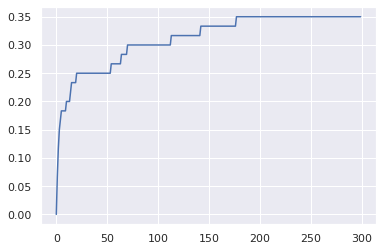

In [139]:
err = np.zeros(300)


for i in range(1,300):
    #======Your code here============
    X_trn_plot = np.hstack((X_trn, np.tile(X_trn[:, [0]], i)))
    X_tst_plot = np.hstack((X_tst, np.tile(X_tst[:, [0]], i)))
    prior, mean, std,output_labels = gnb_train(X_trn_plot, y_trn)
    y_pred = gnb_predict(X_tst_plot, prior, mean, std, output_labels)
    err[i] = hamming_loss(y_tst, y_pred)
    
    
    
    #======Your code here============
plt.plot(err)